## Project 2 - Data Cleansing Practice on Zillow Data

In this week, we’ll practice how to do regular cleansing in Python with a real-world dataset – Zillow dataset. This Zillow dataset contains abundant missing data and will provide you a good environment to practice your skills on data cleaning.

This step-by-step project will illustrate you various ways to impute missing values.

In [1]:
# Start with importing essentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### 1. Read the train set and property set of Zillow dataset, and name them as train and properties.

In [2]:
train = pd.read_csv("/Users/qi/Desktop/DS /camp/Project 2/Project 2 (new)/Project 2 data/train_2017.csv")
properties = pd.read_csv("/Users/qi/Desktop/DS /camp/Project 2/Project 2 (new)/Project 2 data/properties_2017.csv")

/var/folders/ks/2h2pf76923j665_5l2ksy6mh0000gn/T/ipykernel_70810/717705115.py:2: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  properties = pd.read_csv("/Users/qi/Desktop/DS /camp/Project 2/Project 2 (new)/Project 2 data/properties_2017.csv")


In [3]:
train.shape

(77613, 3)

In [4]:
train.head(5)

,parcelid,logerror,transactiondate
0,14297519,0.025595,2017-01-01
1,17052889,0.055619,2017-01-01
2,14186244,0.005383,2017-01-01
3,12177905,-0.103410,2017-01-01
4,10887214,0.006940,2017-01-01


In [5]:
properties.shape

(2985217, 58)

In [6]:
pd.set_option("display.max_columns",100)
properties.head(5)

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,NaN,NaN,NaN,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,5.0,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,1959.0,1.0,NaN,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,6.0,NaN,NaN,NaN,5068.0,NaN,NaN,5068.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,NaN,NaN,1776.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,1.0,NaN,196751.0,440101.0,2016.0,243350.0,5725.17,NaN,NaN,NaN


#### 2. Merge train and properties to one dataframe on parcelid and call it as df_train. Drop the column of 'parcelid' and 'transactiondate'. Check the first 5 rows to see how this merged dataset looks like.

In [7]:
df_train = train.merge(properties, on = 'parcelid')
df_train.drop(['parcelid','transactiondate'],axis = 1,inplace=True)
df_train.head(5)

,logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,0.025595,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,NaN,3100.0,3100.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,633.0,NaN,NaN,33634931.0,-117869207.0,4506.0,NaN,NaN,NaN,NaN,NaN,122,261.0,NaN,6.059063e+07,53571.0,1286.0,NaN,96978.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,1998.0,NaN,NaN,485713.0,1023282.0,2016.0,537569.0,11013.72,NaN,NaN,6.059063e+13
1,0.055619,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,1465.0,1465.0,1465.0,NaN,NaN,1465.0,NaN,6111.0,1.0,1.0,1.0,0.0,NaN,NaN,34449266.0,-119281531.0,12647.0,NaN,NaN,NaN,NaN,NaN,1110,261.0,NaN,6.111001e+07,13091.0,2061.0,NaN,97099.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1967.0,1.0,NaN,88000.0,464000.0,2016.0,376000.0,5672.48,NaN,NaN,6.111001e+13
2,0.005383,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,NaN,1243.0,1243.0,NaN,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,440.0,NaN,NaN,33886168.0,-117823170.0,8432.0,1.0,NaN,NaN,NaN,1.0,122,261.0,NaN,6.059022e+07,21412.0,1286.0,NaN,97078.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,1962.0,1.0,NaN,85289.0,564778.0,2016.0,479489.0,6488.30,NaN,NaN,6.059022e+13
3,-0.103410,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,NaN,NaN,2376.0,2376.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34245180.0,-118240722.0,13038.0,1.0,NaN,NaN,NaN,1.0,0101,261.0,LCR110000*,6.037300e+07,396551.0,3101.0,NaN,96330.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1970.0,NaN,NaN,108918.0,145143.0,2016.0,36225.0,1777.51,NaN,NaN,6.037300e+13
4,0.006940,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,NaN,NaN,1312.0,1312.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34185120.0,-118414640.0,278581.0,1.0,NaN,NaN,NaN,1.0,010C,266.0,LAR3,6.037124e+07,12447.0,3101.0,268548.0,96451.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1964.0,NaN,NaN,73681.0,119407.0,2016.0,45726.0,1533.89,NaN,NaN,6.037124e+13


In [8]:
df_train.shape

(77613, 58)

In [9]:
df_train.dtypes

logerror                        float64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottuborspa                   object
heatingorsystemtypeid           float64
latitude                        float64


In [10]:
df_train.describe()

,logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,77613.000000,25007.000000,207.000000,50.000000,77579.000000,77579.000000,15.000000,49809.000000,76963.000000,614.0,6037.000000,77378.000000,73923.000000,42.000000,3027.000000,6037.000000,386.000000,77579.000000,8289.000000,76963.000000,25520.000000,25520.000000,49571.000000,7.757900e+04,7.757900e+04,6.932100e+04,16174.0,869.000000,465.0,1074.0,15079.0,77579.000000,7.757900e+04,76107.000000,77579.000000,30974.000000,77529.000000,77579.000000,50.0,10106.000000,223.000000,50703.000000,2393.000000,70.000000,77309.000000,17599.000000,7.746400e+04,7.757800e+04,77579.0,7.757700e+04,77574.000000,2900.000000,7.733200e+04
mean,0.016755,1.812013,7.386473,679.720000,2.298496,3.053223,3.933333,6.533779,2.316392,66.0,1366.165314,1784.935421,1760.284553,1388.761905,2354.491245,1381.388935,2082.500000,6048.814151,1.191217,2.250107,1.815282,350.047061,3.921749,3.400837e+07,-1.182037e+08,2.997344e+04,1.0,517.930955,1.0,1.0,1.0,261.824476,6.049124e+07,33683.055107,2534.514933,187725.110544,96586.692812,1.476276,7.0,1.009598,6.040359,1.110309,305.460928,216.385714,1968.611507,1.434286,1.892811e+05,4.901506e+05,2016.0,3.011515e+05,5995.961788,14.088276,6.049667e+13
std,0.170887,2.965768,2.728030,689.703546,0.996732,1.140480,0.258199,1.722062,0.979689,0.0,670.701336,954.250373,934.352566,122.220874,1186.985442,725.792665,1240.382784,20.747252,0.490980,0.966492,0.588340,261.646070,3.594780,2.652873e+05,3.594085e+05,1.233050e+05,0.0,156.569664,0.0,0.0,0.0,5.141596,2.058962e+05,47211.780350,801.447913,165045.086058,3793.552065,2.823686,0.0,0.118572,0.556035,1.169967,238.735241,190.177514,23.793171,0.544515,2.304107e+05,6.537979e+05,0.0,4.927249e+05,7628.859728,2.181281,1.533339e+12
min,-4.655420,1.000000,2.000000,38.000000,0.000000,0.000000,3.000000,1.000000,1.000000,66.0,44.000000,128.000000,128.000000,1056.000000,598.000000,44.000000,380.000000,6037.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.333953e+07,-1.194754e+08,2.360000e+02,1.0,24.000000,1.0,1.0,1.0,31.000000,6.037101e+07,3491.000000,1286.000000,6952.000000,95982.000000,0.000000,7.0,1.000000,4.000000,1.000000,11.000000,12.000000,1824.000000,1.000000,4.400000e+01,1.000000e+03,2016.0,1.610000e+02,19.920000,3.000000,6.037101e+13
25%,-0.024325,1.000000,7.000000,273.000000,2.000000,2.000000,4.000000,6.000000,2.000000,66.0,955.000000,1182.000000,1172.000000,1344.000000,1624.000000,956.000000,993.750000,6037.000000,1.000000,2.000000,2.000000,0.000000,2.000000,3.381463e+07,-1.184150e+08,5.700000e+03,1.0,424.000000,1.0,1.0,1.0,261.000000,6.037311e+07,12447.000000,1286.000000,46736.000000,96193.000000,0.000000,7.0,1.000000,6.000000,1.000000,170.000000,61.500000,1953.000000,1.000000,8.417925e+04,2.068985e+05,2016.0,8.529300e+04,2712.630000,14.000000,6.037311e+13
50%,0.006670,1.000000,7.000000,515.000000,2.000000,3.000000,4.000000,6.000000,2.000000,66.0,1257.000000,1542.000000,1523.000000,1440.000000,2088.000000,1259.000000,1812.500000,6037.000000,1.000000,2.000000,2.000000,436.000000,2.000000,3.402200e+07,-1.181810e+08,7.206000e+03,1.0,500.000000,1.0,1.0,1.0,261.000000,6.037603e+07,25218.000000,3101.000000,118849.000000,96389.000000,0.0

#### 3.  (a) Generate a dataframe called missing_df from df_train, in which there are two columns, one is the column names of our features, the other column is the missing_count (the number of missing values) of that feature. The table should be ordered by missing_count decendingly.  

In [11]:
##missing_df = df_train.isnull().sum().sort_values(ascending=True)
##missing_df 
#percent_missing = df_train.isnull().sum() * 100 / len(df_train)
##方法1
percent_missing = df_train.isnull().mean()*100
missing_df = pd.DataFrame({'missing_count':df_train.isnull().sum(),'percent_missing': percent_missing})
missing_df = missing_df.reset_index()
missing_df.sort_values("missing_count",inplace = True,ascending=False)
missing_df
##如何做成一个dataframe!!! 并且重新做index
#方法2
#missing_df = pd.DataFrame(df_train.isnull().sum().values, columns=['column_name', 'missing_count'])
#missing_df = missing_df[missing_df['missing_count']>0].sort_values(by='missing_count')
#missing_df

,index,missing_count,percent_missing
6,buildingclasstypeid,77598,99.980673
13,finishedsquarefeet13,77571,99.945885
41,storytypeid,77563,99.935578
3,basementsqft,77563,99.935578
46,yardbuildingsqft26,77543,99.909809
49,fireplaceflag,77441,99.778388
2,architecturalstyletypeid,77406,99.733292
43,typeconstructiontypeid,77390,99.712677
16,finishedsquarefeet6,77227,99.502661
29,pooltypeid10,77148,99.400874


In [12]:
missing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 6 to 0
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            58 non-null     object 
 1   missing_count    58 non-null     int64  
 2   percent_missing  58 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.8+ KB


#### 3.(b) Draw a horizontal bar plot to visualize it.

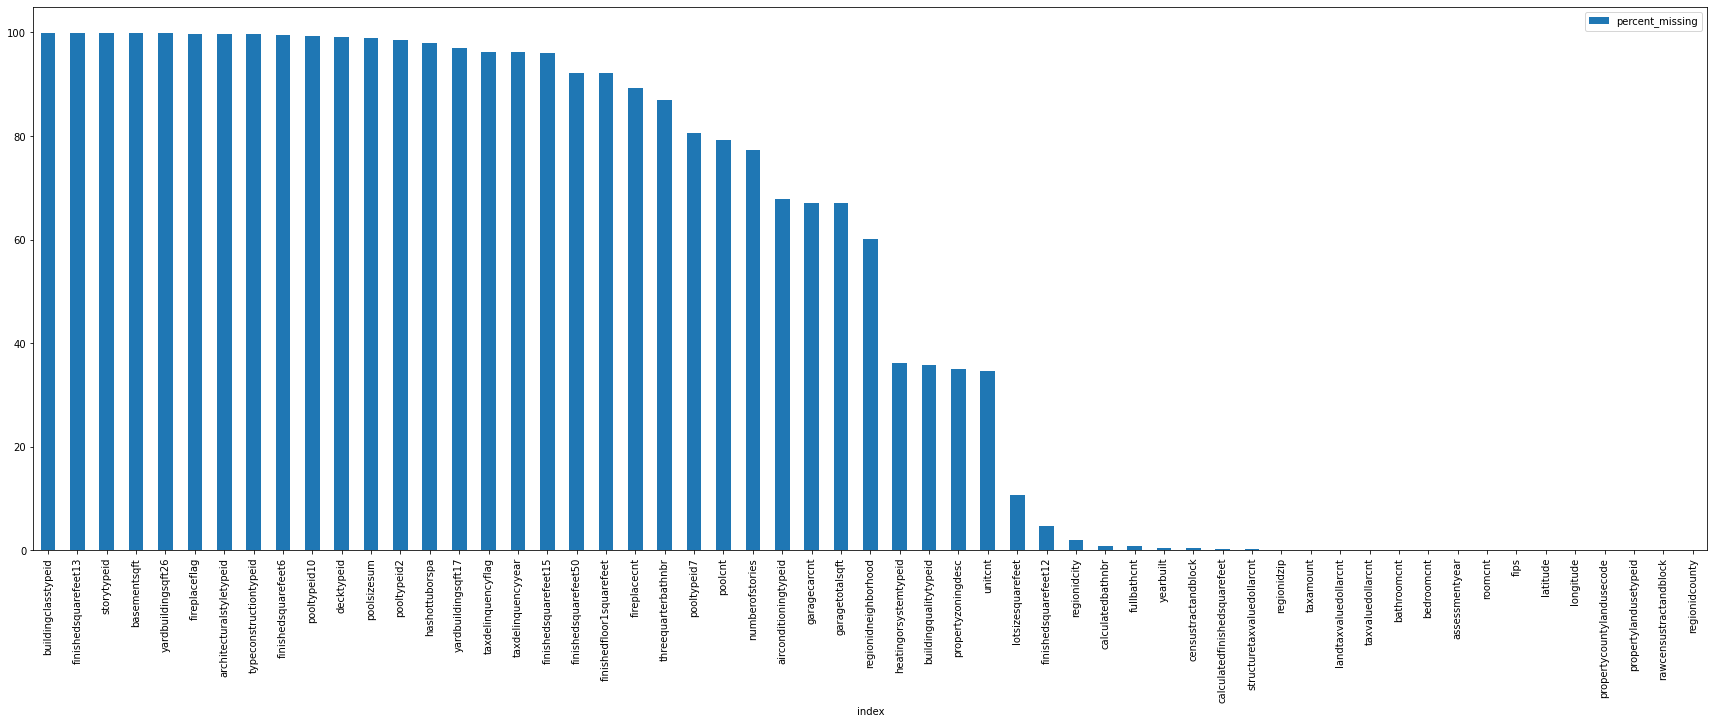

In [13]:
##df_train.isnull().sum().reset_index(name="n").plot.barh(x='index', y='n', rot=45, figsize=(10, 20))
##import matplotlib.pyplot as plt
##import pylab as pl
##fig = plt.figure(figsize=(18,6)), plt.bar(np.arange(missing_df.shape[0]), list(missing_df.values),align = 'center', color = ['red','green','yellow','steelblue']),plt.title('Histogram of missing value of variables'),
##plt.xlabel('columns names'),plt.ylabel('missing count = '),plt.show()
# 添加数值显示for x,y in enumerate(list(miss_analy.missRate.values)): plt.text(x,y+0.12,'{:.2%}'.format(y),ha='center',rotation=90)    plt.ylim([0,1.2])
# 添加x轴标签，并旋转90度 plt.xticks(np.arange(missing_df.shape[0]),list(missing_df['index']))pl.xticks(rotation=90)
ax = missing_df[:-1].plot.bar(x='index', y='percent_missing', rot= 90,figsize=(30, 10), logx=False)

#### 4. Generate the correlation matrix for all the numerical features, and plot it by using heatmap or related visualization methods. 

In [14]:
catcol = df_train.select_dtypes(include=['object']).columns.tolist()
catcol

['hashottuborspa',
 'propertycountylandusecode',
 'propertyzoningdesc',
 'fireplaceflag',
 'taxdelinquencyflag']

In [15]:
corrm = df_train.corr().abs()
corrm

,logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
logerror,1.000000,0.009341,0.011607,0.372067,0.025817,0.031638,0.315372,0.012987,0.029330,NaN,0.012883,0.040516,0.045921,0.085549,0.041200,0.018269,0.072870,0.006413,0.023242,0.027133,0.029002,0.035015,0.006119,0.011726,0.015876,0.011012,NaN,0.021174,NaN,NaN,NaN,0.005679,0.006333,0.001070,0.016493,0.006319,0.001295,0.014567,NaN,0.015540,0.000970,0.001999,0.039753,0.036867,0.004861,0.008204,0.008433,0.003419,NaN,0.000501,0.002199,0.078575,0.004613
airconditioningtypeid,0.009341,1.000000,0.002189,NaN,0.039158,0.088620,NaN,0.037503,0.037686,NaN,NaN,0.050897,0.048777,NaN,0.137170,NaN,0.161699,0.803263,0.034466,0.085126,0.292289,0.541975,0.171427,0.416958,0.422012,0.095551,NaN,NaN,NaN,NaN,NaN,0.206198,0.802385,0.028450,0.803263,0.072863,0.015851,0.835348,NaN,0.010700,0.048448,0.360055,NaN,NaN,0.073284,0.199403,0.057084,0.011747,NaN,0.010876,0.032927,0.039543,0.800552
architecturalstyletypeid,0.011607,0.002189,1.000000,NaN,0.004973,0.003224,NaN,NaN,0.004973,NaN,NaN,0.000176,0.000176,NaN,NaN,NaN,NaN,NaN,NaN,0.011912,0.038470,0.003531,0.082693,0.087643,0.039968,0.247509,NaN,NaN,NaN,NaN,NaN,0.075245,0.003596,0.118478,NaN,0.664948,0.002600,0.048679,NaN,NaN,0.009863,NaN,NaN,NaN,0.118358,0.035153,0.083609,0.003567,NaN,0.026720,0.012766,NaN,0.003596
basementsqft,0.372067,NaN,NaN,1.000000,0.542177,0.444727,NaN,NaN,0.542177,NaN,0.236359,0.277882,0.277882,NaN,NaN,0.220969,NaN,NaN,0.312492,0.559541,0.373523,0.283753,NaN,0.320268,0.279065,0.187221,NaN,0.170763,NaN,NaN,NaN,0.004297,0.368562,0.212239,NaN,0.122761,0.381914,0.556017,NaN,NaN,NaN,NaN,0.116951,0.799649,0.415380,0.090460,0.283011,0.493777,NaN,0.480001,0.485803,NaN,0.368088
bathroomcnt,0.025817,0.039158,0.004973,0.542177,1.000000,0.635479,NaN,0.524034,1.000000,NaN,0.498131,0.772863,0.803920,0.179645,0.541102,0.491659,0.287629,0.016045,0.469225,0.984499,0.495238,0.451538,0.316391,0.026617,0.023752,0.002482,NaN,0.267428,NaN,NaN,NaN,0.045047,0.016283,0.036686,0.024638,0.034656,0.018163,0.037741,NaN,0.196080,0.065032,0.063385,0.282866,0.033873,0.373210,0.331393,0.566023,0.461013,NaN,0.347442,0.465966,0.036793,0.001198
bedroomcnt,0.031638,0.088620,0.003224,0.444727,0.635479,1.000000,NaN,0.108731,0.618283,NaN,0.461381,0.631449,0.661766,0.122713,0.520353,0.437613,0.339475,0.035135,0.228226,0.612911,0.441104,0.606354,0.162814,0.069999,0.008275,0.110596,NaN,0.187779,NaN,NaN,NaN,0.268852,0.035823,0.022035,0.011805,0.024467,0.015187,0.166964,NaN,0.088525,0.039717,0.102825,0.269724,0.130717,0.047853,0.162904,0.296400,0.239326,NaN,0.178958,0.246367,0.013800,0.007834
buildingclasstypeid,0.315372,NaN,NaN,NaN,NaN,NaN,1.000000,0.285241,NaN,NaN,NaN,0.870979,NaN,NaN,0.870979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.242470,0.155977,0.974760,NaN,NaN,NaN,NaN,NaN,NaN,0.118962,0.070795,NaN,NaN,0.044887,NaN,NaN,NaN,NaN,0.110012,NaN,NaN,0.328357,0.104828,0.570302,0.299221,NaN,0.056904,0.410051,NaN,0.066950
buildingqualitytypeid,0.012987,0.037503,NaN,NaN,0.524034,0.108731,0.285241,1.000000,0.523392,NaN,NaN,0.412710,0.491833,NaN,0.253825,NaN,NaN,NaN,NaN,0.523392,NaN,NaN,0.627849,0.144623,0.203266,0.113346,NaN,NaN,NaN,NaN,NaN,0.308523,0.061633,0.079412,NaN,0.038844,0.01

<AxesSubplot:>

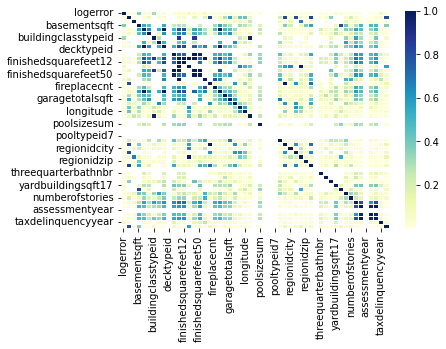

In [16]:
sns.heatmap(corrm, cmap="YlGnBu", linewidths=0.5, annot=False)

#### 5. From the results from Step 4, please list those features having a strong correlation. Generate a list called dropcols, and put those redundent variables into it.

In [17]:
upper_tri = corrm.where(np.triu(np.ones(corrm.shape),k=1).astype(np.bool))
upper_tri
dropcols = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
dropcols

/var/folders/ks/2h2pf76923j665_5l2ksy6mh0000gn/T/ipykernel_70810/2495479190.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = corrm.where(np.triu(np.ones(corrm.shape),k=1).astype(np.bool))


['calculatedbathnbr',
 'finishedsquarefeet12',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fullbathcnt',
 'lotsizesquarefeet',
 'rawcensustractandblock',
 'regionidneighborhood',
 'landtaxvaluedollarcnt',
 'taxamount']

#### 6. Some variables where it is NA can be considered as the object does not exist. Such as 'hashottuborspa', if it is NA, we can assume the house doesn't contain the hot tub or spa. So we need to fix this kind of variables.

(a) Fix the hashottuborspa variable, fill the na part as None.

In [18]:
index = df_train.hashottuborspa.isnull()
df_train.loc[index,'hashottuborspa'] = 'None'
df_train.head(5)
##df.fillna(np.nan).replace([np.nan], [None])

,logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,0.025595,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,NaN,3100.0,3100.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,633.0,None,NaN,33634931.0,-117869207.0,4506.0,NaN,NaN,NaN,NaN,NaN,122,261.0,NaN,6.059063e+07,53571.0,1286.0,NaN,96978.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,1998.0,NaN,NaN,485713.0,1023282.0,2016.0,537569.0,11013.72,NaN,NaN,6.059063e+13
1,0.055619,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,1465.0,1465.0,1465.0,NaN,NaN,1465.0,NaN,6111.0,1.0,1.0,1.0,0.0,None,NaN,34449266.0,-119281531.0,12647.0,NaN,NaN,NaN,NaN,NaN,1110,261.0,NaN,6.111001e+07,13091.0,2061.0,NaN,97099.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1967.0,1.0,NaN,88000.0,464000.0,2016.0,376000.0,5672.48,NaN,NaN,6.111001e+13
2,0.005383,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,NaN,1243.0,1243.0,NaN,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,440.0,None,NaN,33886168.0,-117823170.0,8432.0,1.0,NaN,NaN,NaN,1.0,122,261.0,NaN,6.059022e+07,21412.0,1286.0,NaN,97078.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,1962.0,1.0,NaN,85289.0,564778.0,2016.0,479489.0,6488.30,NaN,NaN,6.059022e+13
3,-0.103410,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,NaN,NaN,2376.0,2376.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,None,2.0,34245180.0,-118240722.0,13038.0,1.0,NaN,NaN,NaN,1.0,0101,261.0,LCR110000*,6.037300e+07,396551.0,3101.0,NaN,96330.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1970.0,NaN,NaN,108918.0,145143.0,2016.0,36225.0,1777.51,NaN,NaN,6.037300e+13
4,0.006940,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,NaN,NaN,1312.0,1312.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,None,2.0,34185120.0,-118414640.0,278581.0,1.0,NaN,NaN,NaN,1.0,010C,266.0,LAR3,6.037124e+07,12447.0,3101.0,268548.0,96451.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1964.0,NaN,NaN,73681.0,119407.0,2016.0,45726.0,1533.89,NaN,NaN,6.037124e+13


(b) Assume if the pooltype id and its related features is null then pool/hottub doesn't exist.

In [19]:
index = df_train.pooltypeid2.isnull()
df_train.loc[index,'pooltypeid2'] = 0

index = df_train.pooltypeid7.isnull()
df_train.loc[index,'pooltypeid7'] = 0

index = df_train.poolcnt.isnull()
df_train.loc[index,'poolcnt'] = 0
df_train[['pooltypeid2','pooltypeid7','poolcnt']].head(5)

,pooltypeid2,pooltypeid7,poolcnt
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,1.0,1.0
3,0.0,1.0,1.0
4,0.0,1.0,1.0


(c) taxdeliquencyflag - assume if it is null then doesn't exist

In [20]:
index = df_train.taxdelinquencyflag.isnull()
df_train.loc[index,'taxdelinquencyflag'] = 0
df_train[['taxdelinquencyflag']].head(5)

,taxdelinquencyflag
0,0
1,0
2,0
3,0
4,0


(d) If Null in garage count (garagecarcnt) it means there are no garages, and no garage means the size (garagetotalsqft) is 0 by default

In [21]:
index = df_train.garagecarcnt.isnull()
df_train.loc[index,'garagecarcnt'] = 0
index = df_train.garagetotalsqft.isnull()
df_train.loc[index,'garagetotalsqft'] = 0
# 观察cnt和sqft之间的逻辑关系?
df_train[['garagecarcnt','garagetotalsqft']].head(10)

,garagecarcnt,garagetotalsqft
0,2.0,633.0
1,1.0,0.0
2,2.0,440.0
3,0.0,0.0
4,0.0,0.0
5,2.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0


#### 7. There are more missing values in the 'poolsizesum' than in 'poolcnt'. Fill in median values for poolsizesum where pool count is >0 and missing.

In [22]:
index = df_train.poolcnt > 0 & df_train.poolsizesum.isnull()
##df_train['poolsizesum'] = df_train.fillna(df_train['poolsizesum'].median(), inplace = True)
df_train.loc[index,'poolsizesum'] = df_train['poolsizesum'].mean()
df_train[['poolcnt','poolsizesum']].head(20)
##带条件的缺失值填充!!!

,poolcnt,poolsizesum
0,0.0,NaN
1,0.0,NaN
2,1.0,517.930955
3,1.0,517.930955
4,1.0,517.930955
5,0.0,NaN
6,1.0,517.930955
7,0.0,NaN
8,0.0,NaN
9,1.0,517.930955


#### 8. The number of missing value of 'fireplaceflag' is more than the 'fireplacecnt'. So we need to mark the missing 'fireplaceflag' as Yes when fireplacecnt>0, then the rest of 'fireplaceflag' should be marked as No. Then for the missing part in fireplacecnt, we can consider the number of fire place is 0.

In [23]:
df_train['fireplaceflag'] = np.where(df_train.fireplacecnt > 0,"Yes","NO")
df_train[['fireplacecnt','fireplaceflag']].head()

,fireplacecnt,fireplaceflag
0,NaN,NO
1,1.0,Yes
2,NaN,NO
3,NaN,NO
4,NaN,NO


#### 9. Fill some features with the most common value for those variables where this might be a sensible approach:

(a) AC Type (airconditioningtypeid)- Mostly 1's, which corresponds to central AC. It is reasonable to assume most other properties where this feature is missing are similar.

In [24]:
index = df_train.airconditioningtypeid.isnull()
df_train.loc[index,'airconditioningtypeid'] = 1
df_train[['airconditioningtypeid']].head(20)

,airconditioningtypeid
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


(b) heating or system (heatingorsystemtypeid)- Mostly 2, which corresponds to central heating so seems reasonable to assume most other properties have central heating.

In [25]:
##values = {'heatingorsystemtypeid': 2}
##df_train['heatingorsystemtypeid'].fillna(value = values)
index = df_train.heatingorsystemtypeid.isnull()
df_train.loc[index,'heatingorsystemtypeid'] = 2
df_train[['heatingorsystemtypeid']].head(20)
##填写错误怎么办？

,heatingorsystemtypeid
0,2.0
1,2.0
2,2.0
3,2.0
4,2.0
5,2.0
6,2.0
7,2.0
8,2.0
9,2.0


#### 10. If the features where missing proportion is too much, we can directly delete them. Here we set 97% as our threshold (This is subjective) and add them into the dropcols. Then drop those features in dropcols from the full table.

In [26]:
##The fastest way to find the sum of NaN or the percentage by columns is:
##for the sum: df.isna().sum()
##for the percentage: df.isna().mean()
#方法1
pct_null = df_train.isnull().sum() / len(df_train)
missing_features = pct_null[pct_null > 0.97].index
df_train.drop(missing_features, axis=1,inplace=True)
df_train.shape
#方法2
#limitPer = len(df_train) * .97
#df_train = df_train.dropna(thresh=limitPer, axis=1)
#df_train.info()

(77613, 48)

In [27]:
missing_df_n=df_train.isnull().sum().sort_values(ascending=True)
missing_df_n.info()

<class 'pandas.core.series.Series'>
Index: 48 entries, logerror to yardbuildingsqft17
Series name: None
Non-Null Count  Dtype
--------------  -----
48 non-null     int64
dtypes: int64(1)
memory usage: 768.0+ bytes


In [28]:
df_train.to_csv('df_train_treated_missing_values.csv')